### Qiskit Coding Lecture 2nd, 2023 1학기 연세대학교 PHY5051-01 
- 
Date and time: 230504, 10am to 1pm KST
- 
[Lecture Syllabus](https://learn.qiskit.org/syllabus/IJN-K0N)

Quick Questions: Oracle이라는 표현은 누가 사용하기 시작했을까요? 제가 찾은 Oracle을 blackbox 기능을 표현하는데 사용한 가장 오래된 논문은, 1938년 Turing의 박사학위 논문입니다. 

<img src="img/turing-oracle.png" alt="Alternative text" width=600/>

이 논문보다 먼저 oracle을 미지의 기능의 함수로 정의하여 사용한 논문을 발견하는 분! 저에게 제보해주세요!

## 수업 중간중간 사용할 퀴즈 플랫폼 로그인

오늘도 마찬가지로 퀴즈쇼를 진행해 봅시다! 오늘은 총 15개의 문제가 준비되어 있습니다.

<h3>모두 로그인해주세요!</h3>

수업을 모두 마친후 최상위 5인에게는 종강전에 특별 상품을 보내드립니다! 기대하세요! (지난번 상품은 무엇이엇을까요?)

https://ahaslides.com/FXWV2

<img src="img/quiz.png" alt="Alternative text" width=800/>

# Deutsch-Jozsa 알고리듬

[Qiskit Textbook Link](https://learn.qiskit.org/course/v2_ch-algorithms/deutsch-jozsa-algorithm)

Qiskit과 함께 하는 코딩 수업 두번째에 오신 여러분을 환영합니다! 이번 시간에는 총 세가지 양자 알고리듬(Deutsch-Jozsa algorithm, Shor's algorithm, Grover's algorithm) 에 대한 실습과 함께, 코딩 실습과 퀴즈 쇼를 함께 진행해 보겠습니다. 

우선 먼저, Deutsch-Jozsa 알고리듬을 알아보도록 합시다.

도이치-조사의 알고리즘은 고전 알고리즘보다 우수한 성능을 가지고 있다고 발표 된 첫 번째 양자 알고리즘입니다 (참고 문헌 [1](https://royalsocietypublishing.org/doi/10.1098/rspa.1992.0167)에서 처음 소개되었습니다). 특정 문제에 대해 양자 컴퓨터를 사용하는 이점이 입증된 첫 번째 양자 알고리즘으로 실생활에 유용한 알고리듬은 아닌, 양자적 이득을 얻는 문제의 컨셉을 제안했다고 보는 것이 더 정확할 것 같습니다. 

## Deutsch-Jozsa Problem

<img src="img/djp.png" alt="Alternative text" width=400/>

비트열을 입력으로 받아,0 또는1 중 하나를 반환하는 위와 같은 부울 함수있다고 가정합니다.

이 함수는 Constant이거나 Balanced 이며, Constant일 경우 입력값에 상관없이 0 또느 1을 반환하지만, Balanced 일 경우는 입력에 따라, 절반은 0을, 절반은 1을 반한홥니다. Deutsch-Jozsa 문제는 이 미지의 함수 - 오라클 - 이 Constant인지, Balanced인지를 판단하는 문제입니다. 

Deutsch는 1985년에 이 문제의 1비트 버전을 `Quantum theory, the Church–Turing principle and the universal quantum computer` [2](https://royalsocietypublishing.org/doi/10.1098/rspa.1985.0070)에서 소개했으며 이 문제를 N 큐비트 문제로 일반화한 결과가 [1](https://royalsocietypublishing.org/doi/10.1098/rspa.1992.0167)의 논문에 소개된 Deutsch-Jozsa 문제입니다. 


## 고전적인 해법

실습을 위해 두 개의 오라클을 준비해두었습니다. 두 오라클은 `'01011'`과 같은 형태의 5 비트 string을 입력으로 받습니다. 다음과 같이 5비트 입력을 준비하는 함수를 불러옵니다. 

In [3]:
from function import test_dj1, test_dj2, prepare_5_bit, test_dj3

prepare_5_bit()

['00000',
 '00001',
 '00010',
 '00011',
 '00100',
 '00101',
 '00110',
 '00111',
 '01000',
 '01001',
 '01010',
 '01011',
 '01100',
 '01101',
 '01110',
 '01111',
 '10000',
 '10001',
 '10010',
 '10011',
 '10100',
 '10101',
 '10110',
 '10111',
 '11000',
 '11001',
 '11010',
 '11011',
 '11100',
 '11101',
 '11110',
 '11111']

prepare_5_bit 함수의 출력 결과를 result라는 이름의 list에 저장한 후, 이 list를 사용해 `test_dj1`과 `test_dj2`가 각각 constant인지, balanced 함수 인지 확인해 봅시다.

고전적인 방식으로 이 문제를 해결하기 위해서는 Brute force라 불리는 방법으로, 가능한 입력을 모두 하나씩 넣어 보아야 합니다. 가장 운이 좋다면 첫번째 입력과 두번째 입력만을 비교해서 다름을 확인하여 두번째 검색 만에 결과를 알수도 있을 것이고, 운이 아주 나쁘다면 절반에 해당하는 16개를 검색해 본 후 17번째 값을 확인해야 할 수도 있습니다. 다음의 예제를 참고하여 두 함수의 성질을 확인해 본 후 퀴즈에 답을 해보세요!

<div class="alert alert-block alert-info"> <b>Quiz Time</b> 코딩을 통해 `test_dj1`과 `test_dj2`이 어떤 함수인지 밝혀낸 후, 퀴즈 플랫폼으로 가서 옳은 답을 선택해 봅시다 (제한시간 3분. 퀴즈플랫폼의 타이머 이용) </div>

In [5]:
# example result의 첫번째 값으로 test_dj3 (trial function) 에 넣어서 결과 확인
result = prepare_5_bit()
test_dj3(result[0])

1

In [2]:
## your code here ## 

from IPython.display import IFrame
# Youtube
IFrame(width="560", height="315", src="https://www.youtube.com/embed/PIljiNRTHqY", title="YouTube video player")

##       

In [6]:
for i in range( 2 ** 5):
    print(test_dj3(result[i]))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [7]:
#constant function test

count = 0

for i in range( 2 ** 5):
    first_result = test_dj3(result[0])
    
    if test_dj3(result[i]) != first_result:
        print("test_function needs", i + 1 , "queries")
        break;
    else:
        count += 1
        if count == (2**5 -1):
            print("test_function is a constant function")


test_function is a constant function


In [8]:
#test dj1
count = 0

for i in range( 2 ** 5):
    first_result = test_dj1(result[0])
    
    if test_dj1(result[i]) != first_result:
        print("test_dj1 needs", i + 1 , "queries")
        break;
    else:
        count += 1
        if count == (2**5 -1):
            print("test_dj1 is a constant function")  

test_dj1 needs 2 queries


In [9]:
#test dj2
count = 0

for i in range( 2 ** 5):
    first_result = test_dj2(result[0])
    
    if test_dj2(result[i]) != first_result:
        print("test_dj2 needs", i + 1 , "queries")
        break;
    else:
        count += 1
        if count == (2**5 -1):
            print("test_dj2 is a constant function") 

test_dj2 needs 17 queries


네 맞습니다! 두 함수는 모두 Balanced 함수이고, 제가 작성한 코드 기준으로 각각 2번, 17번의 Query가 필요했습니다. 

그럼 이제 양자컴퓨터의 해법을 살펴보도록 합시다.

## 양자적 해법

### Qubit encoding

지금까지 우리는 Hadamard Gate를 사용하여, 큐비트의 중첩상태를 활용해 양자 회로에 테스트하고자 하는 입력상태를 한꺼번에 전달하는 방식을 사용했습니다. 이것은 Quantum Parallelism이라 불리는 아주 간단하면서 강력한 방법 중, 고전정보-0또는 1-를 큐비트의 $|0\rangle, |1\rangle$에 매핑하여 사용하는 "Basis Encoding"에 해당합니다. 

다음의 양자회로가 Encoding 하는 고전 상태는 무엇인지 생각해봅시다.

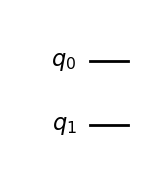

<IPython.core.display.Latex object>

In [12]:
qc = QuantumCircuit(2)
display(qc.draw('mpl'))
display(array_to_latex(Statevector(qc)))

맞습니다! '00'입니다. 그렇다면 다음의 상태를 3큐비트 회로에 인코딩 해봅시다. (initialize 사용 금지!)
$$|\psi\rangle = \frac{1}{\sqrt{2}}(|101\rangle + |111\rangle)$$

In [13]:
## your code here ##


# Youtube
IFrame(width="560", height="315", src="https://www.youtube.com/embed/PIljiNRTHqY", title="YouTube video player", frameborder="0" )

## your code here##

In [11]:
import numpy as np
import pandas as pd
from math import sqrt, pi

from qiskit import *
from qiskit.visualization import plot_histogram, plot_distribution, plot_error_map
from qiskit.visualization.array import array_to_latex

from qiskit.quantum_info import hellinger_fidelity, random_statevector
from qiskit.quantum_info import Statevector


from qiskit_ibm_provider import IBMProvider

from qiskit_aer import AerSimulator


# Plotting tools
import matplotlib.pyplot as plt

from IPython.display import IFrame

In [14]:
qc = QuantumCircuit(3)
qc.x(0)
qc.h(1)
qc.x(2)
display(array_to_latex(Statevector(qc)))

<IPython.core.display.Latex object>

<div class="alert alert-block alert-info"> <b>Quiz Time</b> 회로가 인코딩하는 값을 바로 연결하시오, 제한시간 1분 </div>


이어서, 우리가 자주 사용하게 될, 모든 큐비트에 Hadamard Gate를 사용한 회로를 만들고 StateVector를 계산해 봅시다.

In [63]:
## your code here ##


# Youtube
IFrame(width="560", height="315", src="https://www.youtube.com/embed/PIljiNRTHqY", title="YouTube video player", frameborder="0" )

## your code here##

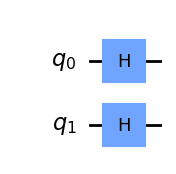

<IPython.core.display.Latex object>

In [28]:
qc = QuantumCircuit(2)
qc.h([0,1])
display(qc.draw('mpl'))
display(array_to_latex(Statevector(qc)))

간단한 회로로 실습에서 계속 사용할 Data Encoding 방법을 익혔으니, Deutsch-Jozsa 문제를 수식을 사용해 확인해 봅시다.


### 수식으로 이해해 보기

Qiskit Textbook의 설명이 다소! 헷갈리는 부분이 있으니, 하나의 추가적인 Reference를 사용해서 알고리듬의 방식을 잘 이해해 봅시다. 

[Thomas Wong - Introduction to classical and quantum computing](https://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e3p.pdf)

<img src="https://learn.qiskit.org/content/v2/ch-algorithms/images/deutsch_steps.png" alt="Alternative text" width=600/>

### Step 0 - State preparation

$$|0\rangle^{\otimes n} |1\rangle$$

### Step 1 - Apply Hadamard

$$|+\rangle^{\otimes n} |-\rangle$$
이때, $|+\rangle^{\otimes n} = \frac{1}{\sqrt{2^n}}(|0\rangle + |1\rangle)^{\otimes n} = \frac{1}{\sqrt{2^n}}\sum_{x \in \{0,1\}^n}^{}|x\rangle $

### Step 2 - Apply Oracle

Textbook과 이 노트의 표현을 합치면, 

$\frac{1}{\sqrt{2^{n+1}}}\sum_{x \in \{0,1\}^n}^{} |x\rangle (|0\rangle - |1\rangle)  \rightarrow U_f ( y \rightarrow y \bigoplus f(x)) \rightarrow $ 이면 (이때 $\bigoplus$는 add modulo 2. 즉 1 + 1 = 0,0 + 1 = 1)

만약 $f(x) = 0 이면, |0\rangle - |1\rangle$ 이고 $f(x) = 1 이면, |1\rangle - |0\rangle$이므로 이것을 조금 더 축약하여 정리하면, $(-1)^{f(x)}(|0\rangle - |1\rangle)$로 쓸수 있습니다.. 따라서, 아래쪽 $|-\rangle$ 상태의 큐비트가 변하지 않고, $f(x)$값이 1인 x에 대하여, $-1$의 Phase가 $x$에 씌워지는 것으로 이해할 수 있기 때문에 입력쪽 큐비트를 다시 다음과 같이 정리할 수 있습니다.
$$\frac{1}{\sqrt{2^{n}}}\sum_{x \in \{0,1\}^n}^{}(-1)^{f(x)} |x\rangle$$

### Step 3 - Apply Hadamard

$\frac{1}{\sqrt{2^{n}}}\sum_{x \in \{0,1\}^n}^{}(-1)^{f(x)} |x\rangle$의 상태에 최종적으로 Hadamard 게이트를 적용하며, 이때의 상태는 다음과 같습니다 - $\frac{1}{\sqrt{2^{n}}}\sum_{x \in \{0,1\}^n}^{}(-1)^{f(x)}H^{\otimes n} |x\rangle$. 여기에서 $H^{\otimes n} |x\rangle$이 부분에 주목해 봅시다.
$$H^{\otimes n} |x\rangle = H|x_{n-1}\rangle H|x_{n-2}\rangle ... H|x_0\rangle$$
$x$의 값(0 or 1)에 따라 $H|x\rangle = |+\rangle or |-\rangle$이 되므로, 위와 같은 방식으로 이 상태를 다음과 같이 정리할 수 있습니다.
$$H|x\rangle = \frac{1}{\sqrt{2}}(|0\rangle + (-1)^{x_i}|1\rangle)$$

이제 $x_{n-1} .. x_0$까지 모두를 한데 써보면

$$H|x_{n-1}\rangle H|x_{n-2}\rangle ... H|x_0\rangle = $$
$$\frac{1}{\sqrt{2^n}}[(|0\rangle + (-1)^{x_{n-1}}|1\rangle)...(|0\rangle + (-1)^{x_1}|1\rangle)(|0\rangle + (-1)^{x_0}|1\rangle)]$$

이때 모든 x들을 하나의 상태로 합치면, 
$$\frac{1}{\sqrt{2^n}}[(|000...00\rangle + (-1)^{x_0}|00000..01\rangle) + ((-1)^{x_1}|000..0010\rangle) + (-1)^{x_0}(-1)^{x_1}|00000..11\rangle) .. + .. $$
$$(-1)^{x_0}(-1)^{x_1}..(-1)^{x_{n-2}}(-1)^{x_{n-1}}|11..11\rangle$$

이 식을 다시 정리하면, 
$$\frac{1}{\sqrt{2^n}}[(|000...00\rangle + (-1)^{x_0}|00000..01\rangle) + ((-1)^{x_1}|000..0010\rangle) + (-1)^{x_0 + x_1}|00000..11\rangle) .. + (-1)^{x_0+x_1..+x_{n-2}+x_{n-1}}|11..11\rangle$$

이때 -1의 계수는 양자상태가 지니는 1의 개수의 합이 되며, 따라서 새롭게 만들어진 양자 상태(측정될 상태)를 y라 정의하면 $|y\rangle = |y_{n-1}..y_0\rangle$이고, $x \cdot y = x_{n-1}y_{n-1} + ... x_0y_0$이라 정의하면, 
$$H^{\otimes n} |x\rangle = \frac{1}{\sqrt{2^{n}}}\sum_{y \in \{0,1\}^n}^{}(-1)^{x \cdot y} |y\rangle$$

따라서 최종 상태를 모두 합하여 정리하면, 

$$H^{\otimes n} |x\rangle = \frac{1}{2^n}\sum_{y \in \{0,1\}^n}^{}[\sum_{x \in \{0,1\}^n}^{}(-1)^{f(x) + x \cdot y}] |y\rangle$$

<div class="alert alert-block alert-info"> <b>Quiz Time</b> 위의 식에서, $x$와 $y$는 각각 무엇을 의미하나요? (제한시간 1분)</div>

이때, $|000..00\rangle$을 얻는 경우에 대해서 가정해 봅시다. 
$$\frac{1}{2^n}[\sum_{x \in \{0,1\}^n}^{}(-1)^{f(x)}] |0000..00\rangle$$

이 상태가 측정될 확률은 $f(x)$가 Constant인지, Balanced인지에 따라 다릅니다. 

만약 $f(x)$가 Constant이면, $f(x)$를 $f(00..00)$으로 보아도 무방하므로, 위의 식에서 $|000..00\rangle$로 측정될 크기에 관련된 부분은 $$\frac{1}{2^n}[\sum_{x \in \{0,1\}^n}^{}(-1)^{f(0000..00)}] = \frac{1}{2^n}[(-1)^{f(0000..00)} 2^n]$$
이 되고 $f(x)$ 0으로 constant이건, 1로 Constant이건, 측정확률은 1이 됩니다.

<div class="alert alert-block alert-info"> <b>Quiz Time</b> 퀴즈 플랫폼으로 가서 문제를 풀어보세요! (제한 시간 30초)</div>

만약 $f(x)$가 Balanced이면, $f(x)$는 절반은 0, 절반은 1로 결정되므로 Sum의 결과는 0이되어, 이 회로가 $|00..00\rangle$로 측정될 확률은 0이되고, 회로는 다른 상태로 측정되게 됩니다. 

`test_dj1`과 `test_dj2`

그럼 지금부터 이 회로를 단계별로 구현하면서 확인해 봅시다. 실습을 위해서는 2큐비트 회로를 사용하겠습니다.

## 2비트 Deutsch-Jozsa Balanced 회로 구현 실습!

다음과 같은 블랙박스함수 (오라클)을 지니는 2비트 DJ 회로를 구성해 봅시다.

$$f(00) = 0$$
$$f(01) = 1$$
$$f(10) = 1$$
$$f(11) = 0$$

### 초기 상태 준비.

다음의 셀에서 세개의 큐비트와 두개의 고전 비트로 구성된 회로를 만들고, q0와 q1은 Hadamard 게이트를 적용해 중첩상태로, q2는 - 상태로 초기화 합니다.

In [15]:
import numpy as np
import pandas as pd
from math import sqrt, pi

from qiskit import *
from qiskit.visualization import plot_histogram, plot_distribution, plot_error_map
from qiskit.visualization.array import array_to_latex

from qiskit.quantum_info import hellinger_fidelity, random_statevector
from qiskit.quantum_info import Statevector


from qiskit_ibm_provider import IBMProvider

from qiskit_aer import AerSimulator


# Plotting tools
import matplotlib.pyplot as plt

from IPython.display import IFrame

In [64]:
## your code here ##


# Youtube
IFrame(width="560", height="315", src="https://www.youtube.com/embed/PIljiNRTHqY", title="YouTube video player", frameborder="0" )

## your code here##

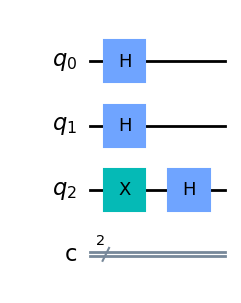

In [16]:
dj = QuantumCircuit(3,2)
dj.h([0,1])
dj.x(2)
dj.h(2)
dj.draw('mpl')

오라클은 q0과 q1이 각각 1일때 q2에 1을 가할수 있도록 CNot gate 하나를 control bit을 q0으로, target bit을 q2로 설정하고,CNOT 게이트를 control bit은 q1으로, target bit은  q2로 설정하여  코딩해 보세요

In [59]:
## your code here ##


# Youtube
IFrame(width="560", height="315", src="https://www.youtube.com/embed/PIljiNRTHqY", title="YouTube video player", frameborder="0" )
## your code here##

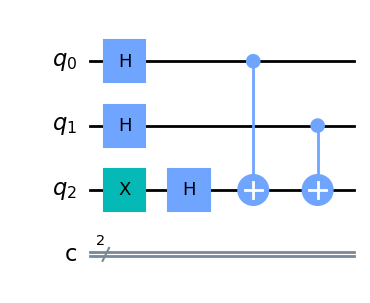

In [17]:
dj.cx(0,2)
dj.cx(1,2)
dj.draw('mpl')

이제 q0과 q1에 하다마드 게이트를 적용하고 이 두 큐비트에 측정을 가해봅니다.

In [58]:
## your code here ##


# Youtube
IFrame(width="560", height="315", src="https://www.youtube.com/embed/PIljiNRTHqY", title="YouTube video player", frameborder="0" )
## your code here##

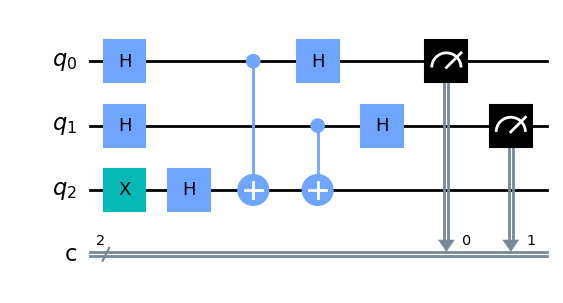

In [18]:
dj.h([0,1])
dj.measure(0,0)
dj.measure(1,1)
dj.draw('mpl')

Qiskit Aer의 AerSimulator를 사용해서 Shots=20000으로 회로를 측정하고 counts를 plot_histogram으로 그려보세요

In [57]:
## your code here ##


# Youtube
IFrame(width="560", height="315", src="https://www.youtube.com/embed/PIljiNRTHqY", title="YouTube video player", frameborder="0" )
## your code here##

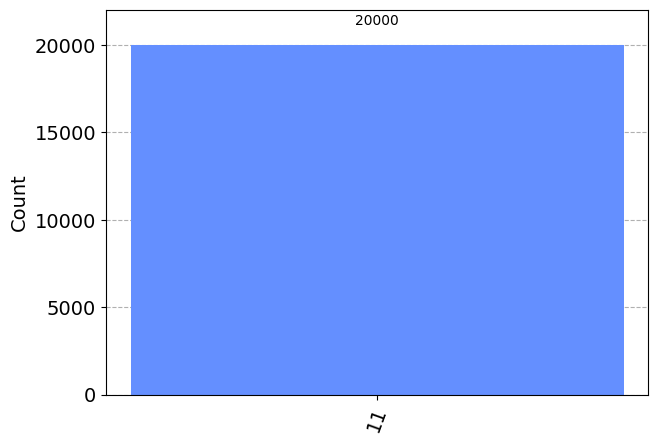

In [19]:
backend = AerSimulator()
counts = backend.run(dj, shots=20000).result().get_counts()
plot_histogram(counts)

이 회로는 Balanced 함수입니다!

지금부터는 Qiskit Textbook의 내용과 같이 일반적인 Deutsch-Jozsa 회로를 만드는 함수를 구현하고 실제 백엔드에서 실습해 보도록 합시다.

## Generalized Deutsch-Jozsa 회로 구현 실습!

먼저, Constant, Balanced에 각각 해당하는 Oracle을 만드는 연습을 해봅시다. N 비트의 입력을 받는 오라클을 만들기 위해서는 Auxilary 큐비트 하나를 감안하여, 총 N+1개의 Qubit을 갖는 양자회로를 만들어야 함을 염두에 둡시다.

### Oracle - Constant

Constant 오라클은 입력값에 무관하게 항상 0 또는 1을 반환합니다. 가장 간단한 형태는 무엇이 될까요? 


In [20]:
N = 4 #input bit string length

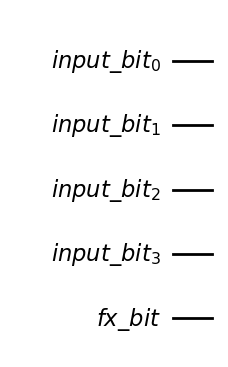

In [21]:
input_qubit = QuantumRegister(N, 'input_bit')
fx_qubit = QuantumRegister(1, 'fx_bit')

const_oracle = QuantumCircuit(input_qubit, fx_qubit)

const_oracle.draw('mpl')

위의 회로는 입력값에 무관하게 $f(x) = 0$을 반환하는 Constant Oracle입니다. 비슷한 방법으로 입력값에 무관하게 $f(x) = 1$을 반환하는 Constant Oracle을 만들어 봅시다.

In [56]:
## your code here ##


# Youtube
IFrame(width="560", height="315", src="https://www.youtube.com/embed/PIljiNRTHqY", title="YouTube video player", frameborder="0" )
## your code here##

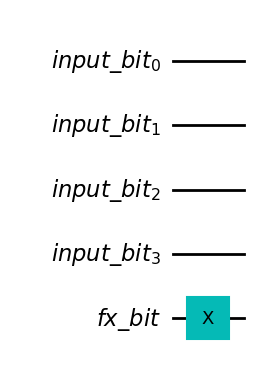

In [52]:
input_qubit = QuantumRegister(N, 'input_bit')
fx_qubit = QuantumRegister(1, 'fx_bit')

const_oracle = QuantumCircuit(input_qubit, fx_qubit)
const_oracle.x(fx_qubit)
#const_oracle.x(4)
const_oracle.draw('mpl')

위의 두 방식을 함께 고려하여 $f(x) = 0 or 1$인 N bit 입력을  갖는 Constant Oracle을 만드는 회로를 다음과 같이 준비해 둡니다 ([Textbook 코드](https://learn.qiskit.org/course/v2_ch-algorithms/deutsch-jozsa-algorithm#const_oracle))

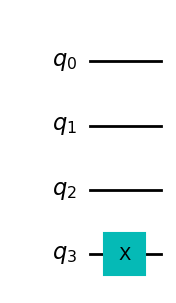

In [54]:
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw('mpl')

### Balanced Oracle

[example](https://learn.qiskit.org/course/v2_ch-algorithms/deutsch-jozsa-algorithm#example)에서 볼수 있듯이, balanced 오라클을 만드는 방식은 다양합니다. 가장 간단한 변형법은 n번째 비트가 0일때, $f(x) = 1$이 되도록 만드는 것이고, `CNot Gate`를 적용하기 전, 해당 비트에 `X Gate`를 넣는 것으로 간단하게 구현할 수 있습니다. 

다음에서 간단하게 입력의 `0`번째와 `2`번째 비트가 0일때, `1`번째 비트가 1일 때, $f(x) = 1$인 Balanced Oracle을 [Qiskit Textbook](https://learn.qiskit.org/course/v2_ch-algorithms/deutsch-jozsa-algorithm#balanced_oracle)을 참고하여 만들어 봅시다. (제한시간 3분)

In [61]:
## your code here

IFrame(width="560", height="315", src="https://www.youtube.com/embed/B84tAaqC6Bc", title="YouTube video player", frameborder="0", allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share")

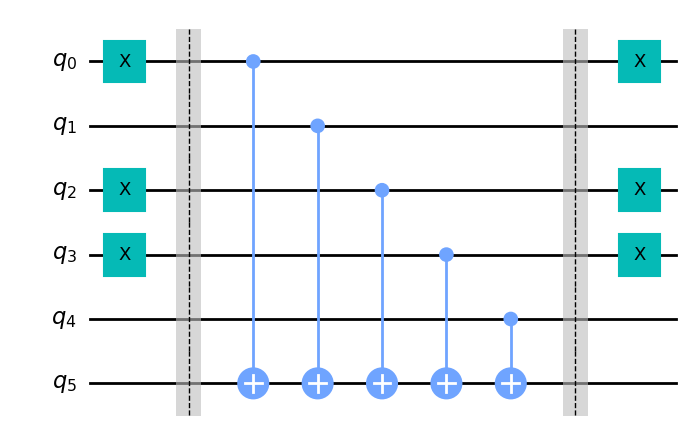

In [22]:
n = 5

balanced_oracle = QuantumCircuit(n+1)
b_str = "10110"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl')

<div class="alert alert-block alert-info"> <b>Quiz Time</b> 퀴즈 플랫폼으로 가서 문제를 풀어보세요! (제한 시간 30초, 리더보드가 있습니다!)</div>

### Full Algorithm [Qiskit Textbook Link](https://learn.qiskit.org/course/v2_ch-algorithms/deutsch-jozsa-algorithm#general_circs)

이제 모든 코드를 합쳐서 N-Qubit Balanced/Constant DJ 회로를 만드는 함수를 만들어 봅시다. 우선, balanced/constant 오라클을 만드는 회로를 먼저 만들어 봅시다.


In [25]:
#입력: case = balanced or constant
#n : 입력 비트의 길이

def dj_oracle(case, n):

    oracle_qc = QuantumCircuit(n+1)
    
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

이제 오라클 회로를 삽입 할, Main 함수를 준비합니다.

In [23]:
#input: oracle circuit
#n: input bit

def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

만들어진 회로를 테스트 해봅시다.

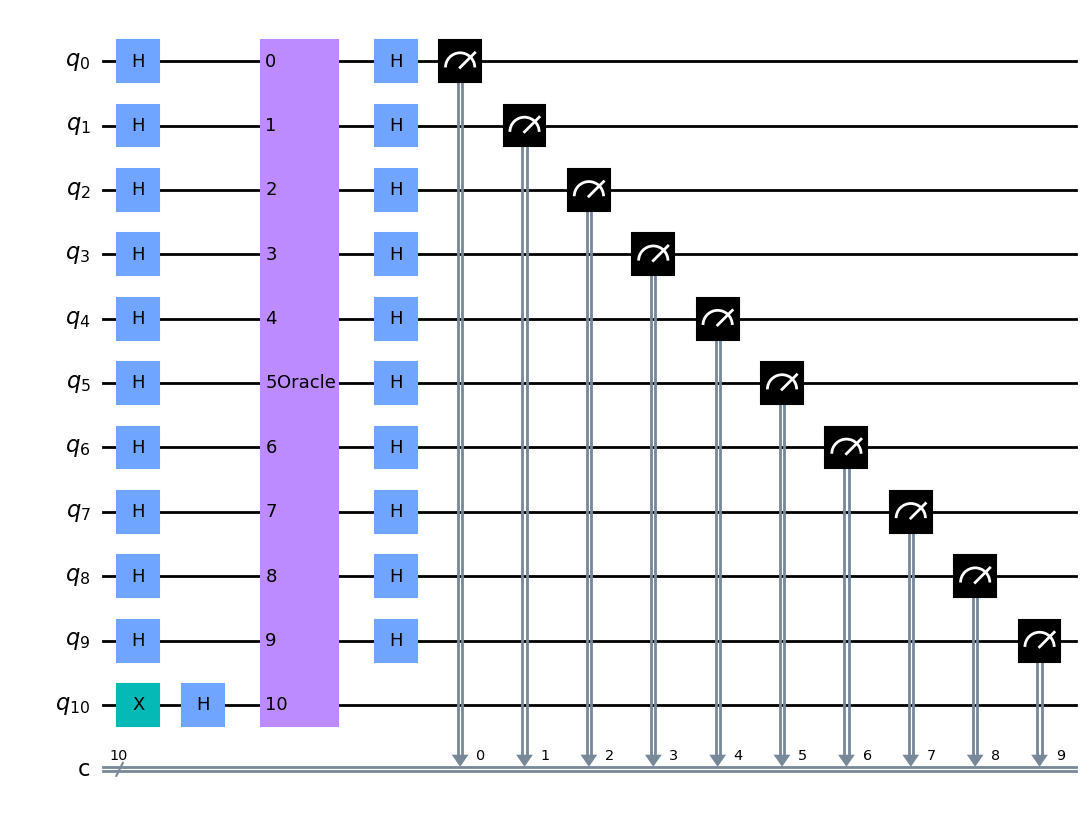

In [26]:
n = 10
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw('mpl')

이 회로를 AerSimulator를 사용해서 시뮬레이션 해봅시다.

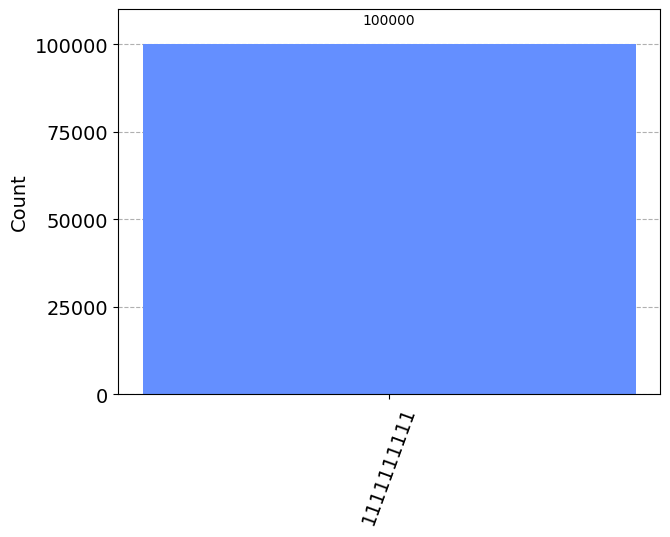

In [27]:
backend = AerSimulator()
dj_circuit_tr = transpile(dj_circuit, backend)
counts = backend.run(dj_circuit_tr, shots=100000).result().get_counts()
plot_histogram(counts)


같은 회로를 Real Backend에 실행해 봅시다! 이 회로는 Measurement를 지니고 있기 때문에 Qiskit Runtime의 Sampler를 사용해 봅시다.

Qiskit Runtime이나 Sampler는 지난 시간에 함께 배부된 [Extra Exercise](https://github.com/qiskit-community/korean-community/blob/main/tutorials/2023%20Yonsei%20Lecture/Extra%20Exercise%20-%20Qiskit%20Runtime.ipynb)를 참고해 주세요!

In [74]:
# Save the Runtime account credentials if you have not done so already
# If you need to overwrite the account info, please add `overwrite=True`
#my_token = 'your token'
#QiskitRuntimeService.save_account(channel='ibm_quantum', token=my_token, overwrite=True)

In [28]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler, Estimator
from qiskit_ibm_provider import least_busy


service = QiskitRuntimeService(instance='ibm-q-yonsei/internal/qc-and-simulatio')

In [29]:
service.backends()

[<IBMBackend('ibm_cairo')>,
 <IBMBackend('ibmq_mumbai')>,
 <IBMBackend('ibm_auckland')>,
 <IBMBackend('ibm_hanoi')>,
 <IBMBackend('ibm_geneva')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibmq_guadalupe')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibmq_kolkata')>,
 <IBMBackend('ibm_oslo')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibm_washington')>,
 <IBMBackend('ibm_seattle')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_stabilizer')>]

In [30]:
backend = least_busy(service.backends(filters=lambda x: x.configuration().n_qubits == 27 and
                                   not x.configuration().simulator and x.status().operational==True))
print(backend)

<IBMBackend('ibm_hanoi')>


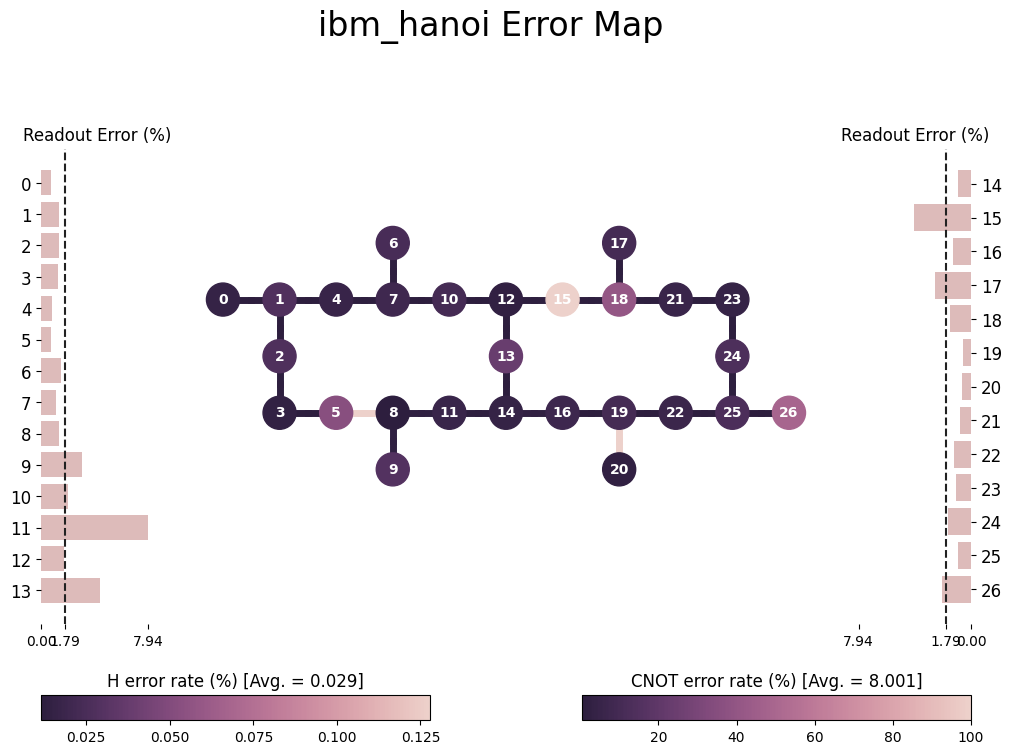

In [31]:
plot_error_map(backend)

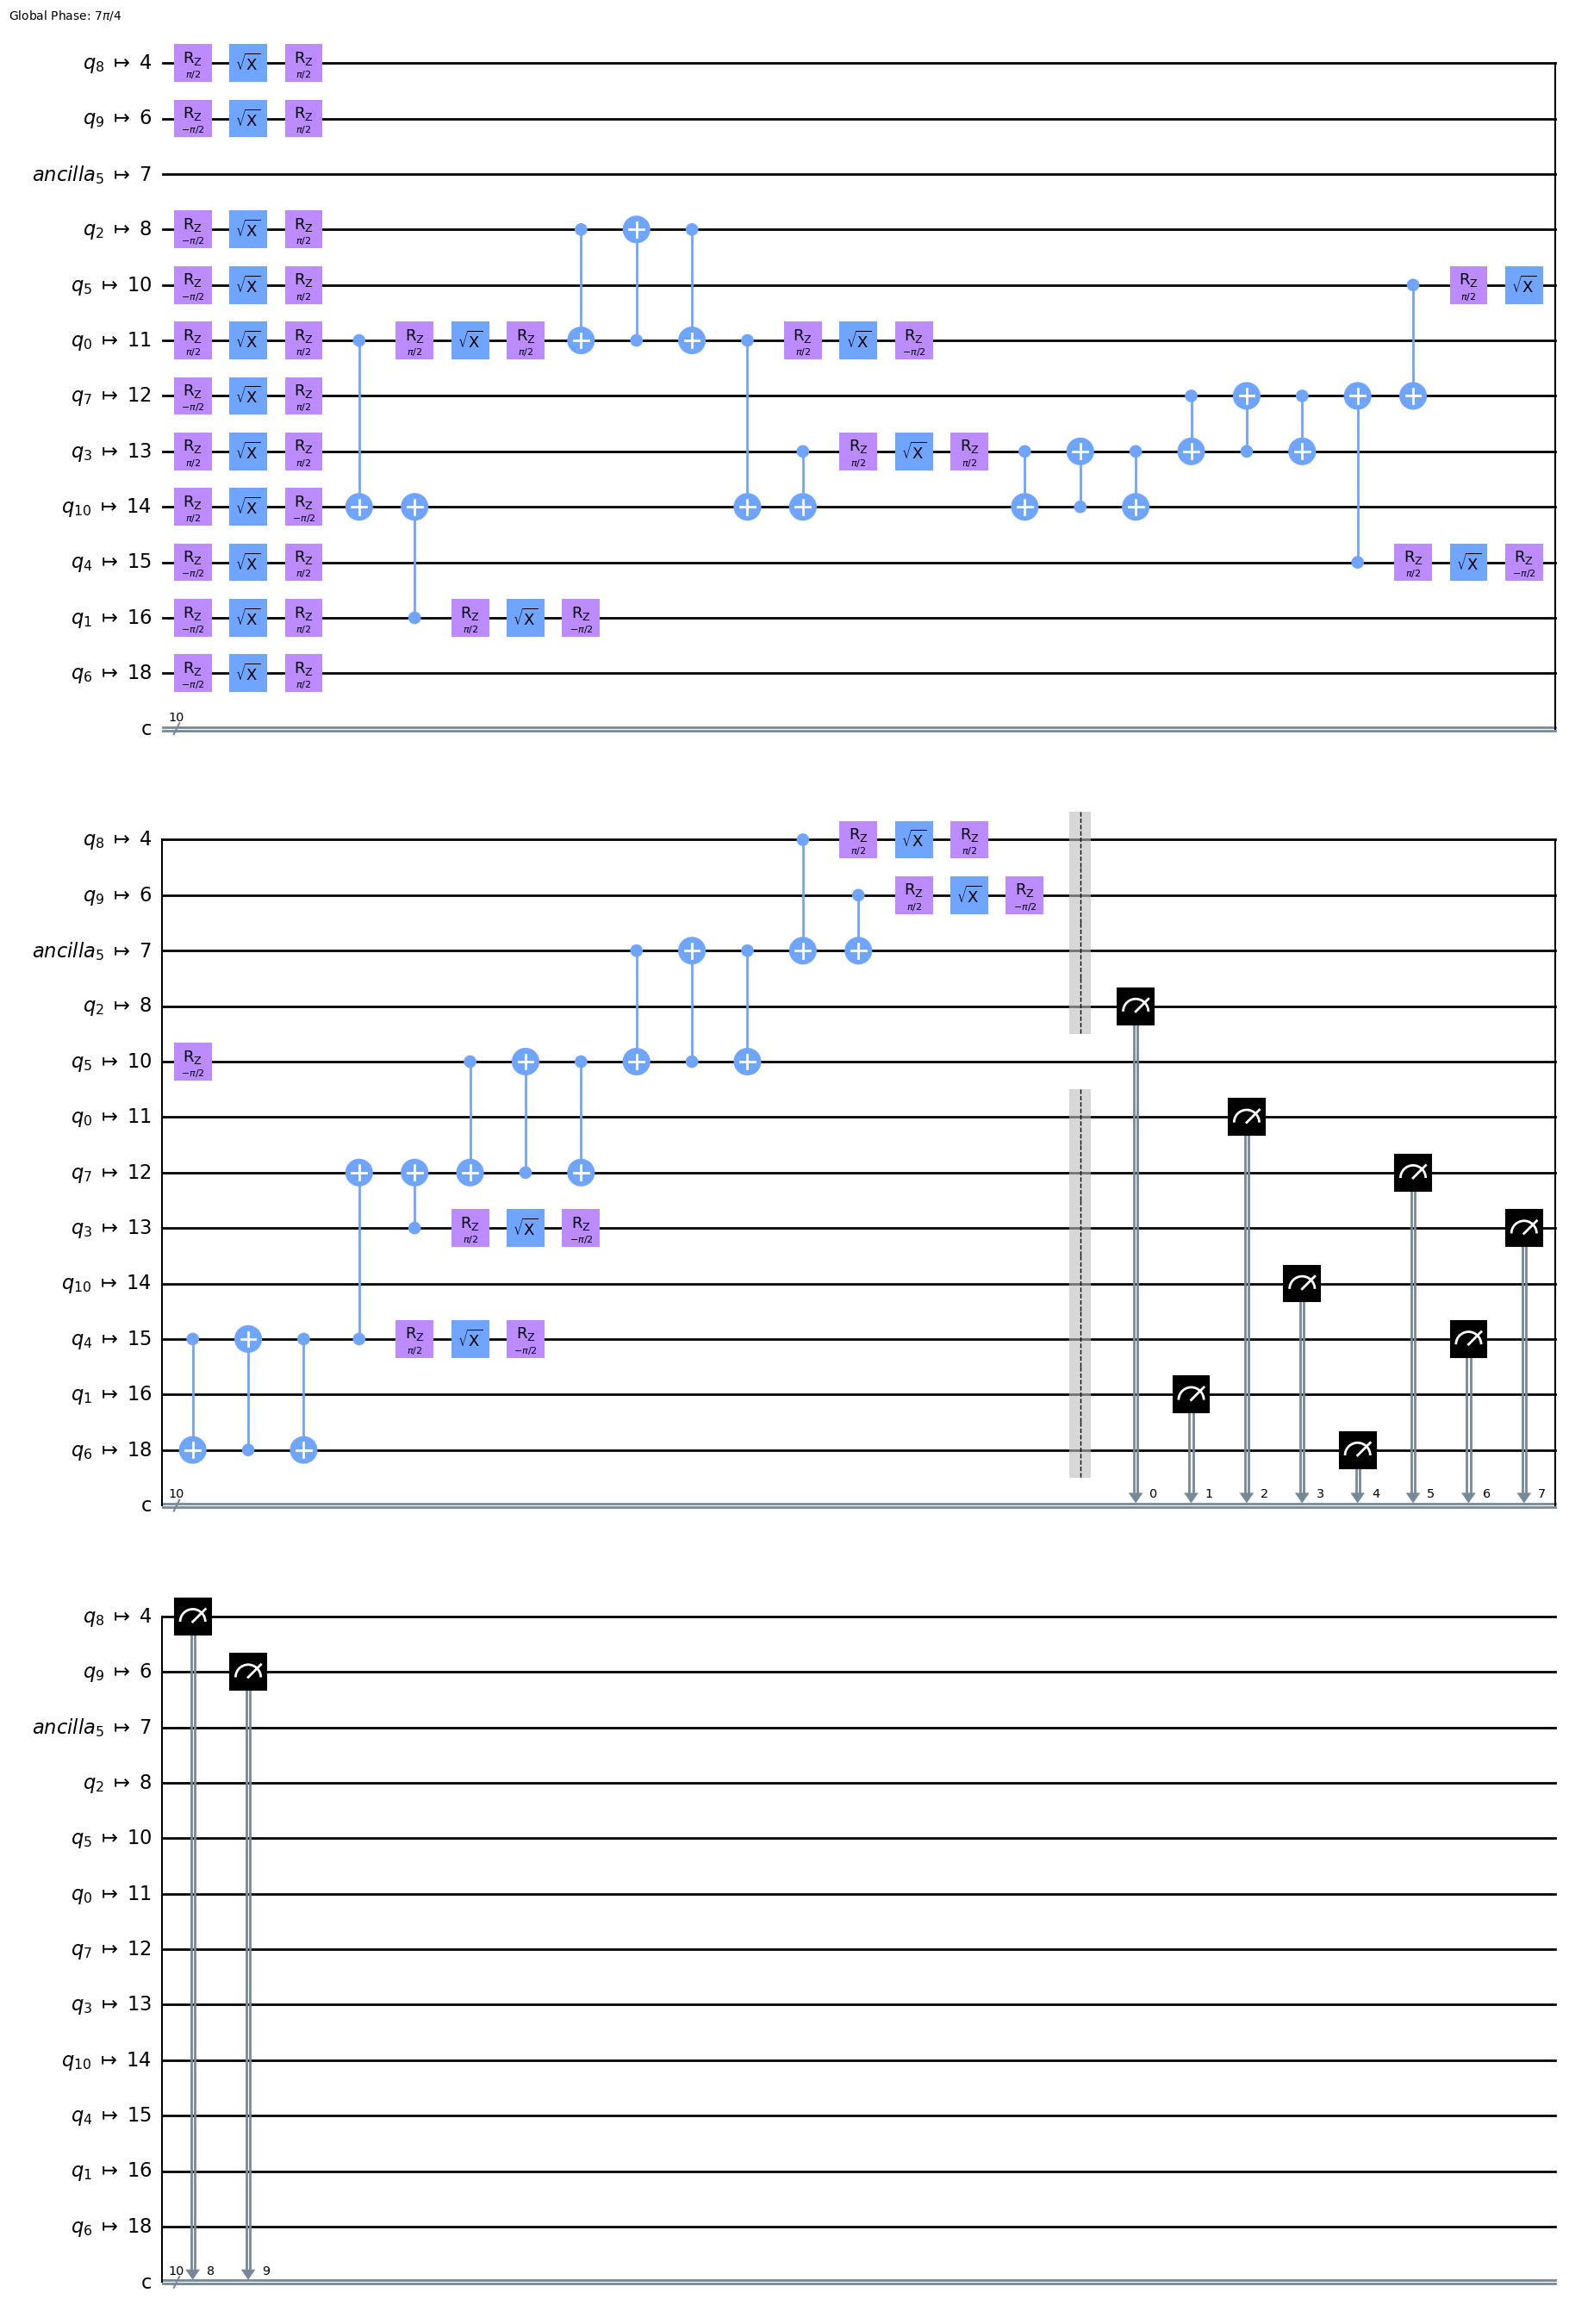

In [32]:
session = Session(backend=backend)
sampler = Sampler(session=session)
tr_circuit = transpile(dj_circuit, backend)
tr_circuit.draw('mpl', idle_wires=False)

In [33]:
sampler_job1 = sampler.run(tr_circuit,shots=int(10e4),resilience_level=0)

In [34]:
sampler_job2 = sampler.run(tr_circuit,shots=int(10e4),resilience_level=1)

In [60]:
display(sampler_job1.job_id())
display(sampler_job2.job_id())

'ch7frdppleju56aer4u0'

'ch7fre9pleju56aer510'

In [35]:
sampler_job1 = service.runtime.job('ch7frdppleju56aer4u0')
sampler_job2 = service.runtime.job('ch7fre9pleju56aer510')
display(sampler_job1.status())
display(sampler_job2.status())

<JobStatus.DONE: 'job has successfully run'>

<JobStatus.DONE: 'job has successfully run'>

In [36]:
#resilience = 0 result
result1 = sampler_job1.result()

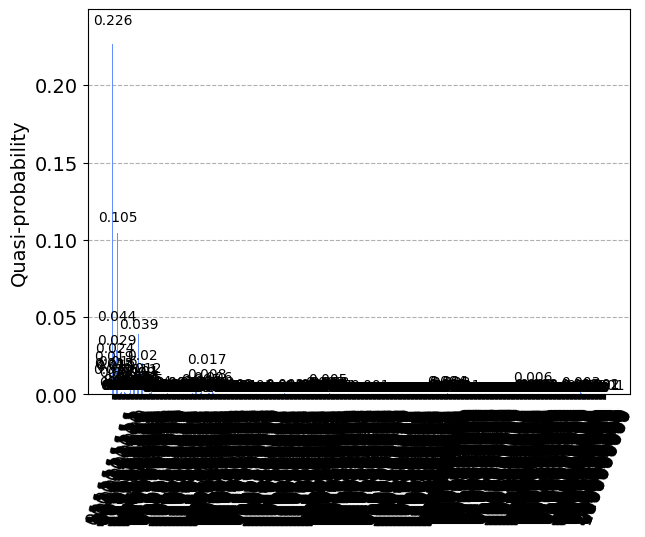

In [37]:
plot_distribution(result1.quasi_dists[0].binary_probabilities(),target_string='1'*10, sort='hamming')

In [38]:
#resilience = 0 result
result2 = sampler_job2.result()

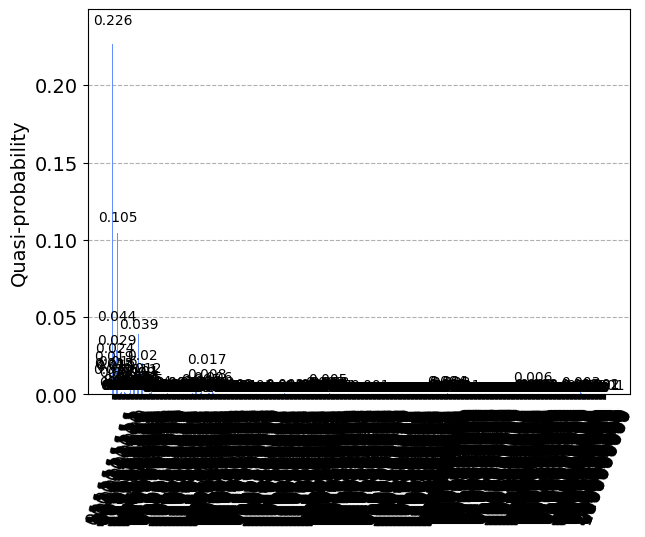

In [39]:
plot_distribution(result1.quasi_dists[0].binary_probabilities(),target_string='1'*10, sort='hamming')